# Import Necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [5]:
# Load the dataset
data = pd.read_csv("C:\\Users\\akhil\\Downloads\\archive (1)\\Housing.csv")

In [7]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
data = data.dropna()

In [15]:
X = data[['area']]  # Feature
y = data['price']   # Target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape, X_test.shape)

(436, 1) (109, 1)


In [21]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#  Evaluate the Model

In [23]:
# Predict
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R² Score:', r2)

Mean Absolute Error (MAE): 1474748.1337969352
Mean Squared Error (MSE): 3675286604768.185
R² Score: 0.27287851871974644


# Plot Regression Line

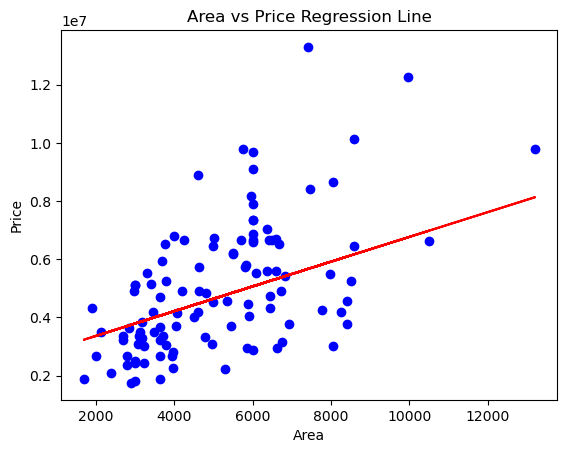

In [25]:
# Plo
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price Regression Line')
plt.show()

In [27]:
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

Intercept: 2512254.2639593435
Coefficient: [425.72984194]


# Multiple Linear Regression

In [29]:
# Features and target
X_multi = data[['area', 'bedrooms', 'bathrooms', 'stories']]
y_multi = data['price']

# Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Model
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

# Predict
y_pred_m = multi_model.predict(X_test_m)

# Evaluation
print('MAE (Multiple):', mean_absolute_error(y_test_m, y_pred_m))
print('MSE (Multiple):', mean_squared_error(y_test_m, y_pred_m))
print('R² (Multiple):', r2_score(y_test_m, y_pred_m))

MAE (Multiple): 1158970.4803166878
MSE (Multiple): 2457741642022.0864
R² (Multiple): 0.5137585349037072
